In [1]:
import pandas as pd
ud=pd.read_csv("Uncleaned_Healthcare_500.csv")
df=pd.DataFrame(ud)
df.head()

,Patient_ID,Name,Age,Gender,Email,Phone,Height_cm,Weight_kg,Blood_Pressure,Diabetes,Date_Visit
0,1.0,Alice,thirty,NaN,noemail,9876543210,NaN,0,100/abc,No,NaN
1,2.0,Bob,thirty,f,user@example.com,9876543210987,-150,0,NaN,NO,2023-02-29
2,3.0,Mark,NaN,f,abc@gmail.,12345,NaN,1200,NaN,Y,2023/13/01
3,4.0,Eve,thirty,Female,test@,98765 43210,NaN,60,140/100,Yes,2020-15-20
4,5.0,Eve,200,m,noemail,98765 43210,one sixty,1200,NaN,Y,2023-07-32


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      471 non-null    float64
 1   Name            447 non-null    object 
 2   Age             406 non-null    object 
 3   Gender          446 non-null    object 
 4   Email           417 non-null    object 
 5   Phone           417 non-null    object 
 6   Height_cm       358 non-null    object 
 7   Weight_kg       418 non-null    object 
 8   Blood_Pressure  385 non-null    object 
 9   Diabetes        444 non-null    object 
 10  Date_Visit      443 non-null    object 
dtypes: float64(1), object(10)
memory usage: 43.1+ KB


In [3]:
df.describe(include="all")

,Patient_ID,Name,Age,Gender,Email,Phone,Height_cm,Weight_kg,Blood_Pressure,Diabetes,Date_Visit
count,471.000000,447,406,446,417,417,358,418,385,444,443
unique,NaN,8,76,9,5,5,5,6,7,9,8
top,NaN,Mark,thirty,f,invalid,abc123,one sixty,1200,110/70,Yes,2023-02-29
freq,NaN,68,111,62,89,98,80,86,60,60,73
mean,251.649682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,144.705785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,127.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,255.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,374.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

Patient_ID         29
Name               53
Age                94
Gender             54
Email              83
Phone              83
Height_cm         142
Weight_kg          82
Blood_Pressure    115
Diabetes           56
Date_Visit         57
dtype: int64

In [5]:
df=df.dropna()
df.duplicated().sum()

np.int64(0)

In [8]:
df["Name"] = df["Name"].str.strip().str.title()
df["Name"] = df["Name"].replace(["N/A", ""], np.nan)

In [7]:
import numpy as np
gender_map = {
    "M": "Male", "MALE": "Male", "m": "Male",
    "F": "Female", "FEMALE": "Female", "f": "Female"
}
df["Gender"] = df["Gender"].replace(gender_map)
df["Gender"] = df["Gender"].replace(["unknown", None], np.nan)


In [9]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0],inplace=False)

In [10]:
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")  # convert wrong text to NaN
df.loc[(df["Age"] < 0) | (df["Age"] > 120), "Age"] = np.nan

In [11]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [12]:
df["Height_cm"] = pd.to_numeric(df["Height_cm"], errors="coerce")
df["Weight_kg"] = pd.to_numeric(df["Weight_kg"], errors="coerce")

df.loc[df["Height_cm"] < 50, "Height_cm"] = np.nan  # unrealistic height
df.loc[df["Weight_kg"] > 300, "Weight_kg"] = np.nan  # unrealistic weight

In [13]:
df["Email"] = df["Email"].str.strip()
df = df[df["Email"].str.contains('@', na=False)]

In [14]:
df["Phone"] = df["Phone"].str.replace(r"[^0-9]", "", regex=True)
df.loc[df["Phone"].str.len() < 10, "Phone"] = np.nan

In [34]:
df["Blood_Pressure"] = df["Blood_Pressure"].where(df["Blood_Pressure"].str.contains("/", na=True))
df["Blood_Pressure"] = df["Blood_Pressure"].fillna(df["Blood_Pressure"].mode()[0])

In [16]:
diabetes_map = {"YES": "Yes", "Y": "Yes", "yes": "Yes", 
                "0": "No", "N": "No", "NO": "No"}
df["Diabetes"] = df["Diabetes"].str.strip().replace(diabetes_map)

In [17]:
import pandas as pd
import numpy as np

# Convert the column to datetime first
df['Date_Visit'] = pd.to_datetime(df['Date_Visit'], errors='coerce')

# Choose a fixed year
year_fixed = 2023

# Create full date range for the year
date_range = pd.date_range(start=f'{year_fixed}-01-01', end=f'{year_fixed}-12-31')

# Fill NaN with a random date from that range
nan_mask = df['Date_Visit'].isna()
df.loc[nan_mask, 'Date_Visit'] = np.random.choice(date_range, nan_mask.sum())

df['Date_Visit'] = pd.to_datetime(df['Date_Visit'])  # ensure type is datetime
# print(df['Date_Visit'])
df.head()

C:\Users\laksh\AppData\Local\Temp\ipykernel_15356\2435072139.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Visit'] = pd.to_datetime(df['Date_Visit'], errors='coerce')


,Patient_ID,Name,Age,Gender,Email,Phone,Height_cm,Weight_kg,Blood_Pressure,Diabetes,Date_Visit
6,7.0,Alice,69.0,Female,abc@gmail.,9876543210,160.0,NaN,200/150,No,2023-05-24
19,20.0,NaN,69.0,Female,abc@gmail.,9876543210,NaN,50.0,130/90,Yes,2023-10-12
20,21.0,Linda,69.0,Male,user@example.com,NaN,NaN,70.0,120/80,Yes,2023-12-25
27,28.0,John,69.0,Male,abc@gmail.,9876543210987,160.0,NaN,100/abc,No,2023-04-24
31,32.0,John,69.0,Male,test@,NaN,NaN,NaN,120/80,Yes,2023-10-12


In [18]:
# Convert to string and keep only digits
df['Phone'] = df['Phone'].astype(str).str.replace(r'\D', '', regex=True)

# Keep only last 10 digits if length is too long
df['Phone'] = df['Phone'].apply(lambda x: x[-10:] if len(x) >= 10 else np.nan)

# Fill NaN with common placeholder
df['Phone'].fillna("9999999999", inplace=False)

df["Phone"]=df["Phone"].fillna(df["Phone"].mode()[0])

In [19]:
df['Height_m'] = df['Height_cm'] / 100
df['BMI'] = df['Weight_kg'] / (df['Height_m'] ** 2)

In [20]:
df['Age_Group'] = pd.cut(df['Age'],
                         bins=[0, 30, 45, 60, 120],
                         labels=['Young', 'Adult', 'Middle Age', 'Senior'])

In [21]:
df['Diabetes_Flag'] = df['Diabetes'].map({'Yes': 1, 'No': 0,'no':0})

In [22]:
df["Height_m"]=df["Height_m"].fillna(df["Height_m"].mode()[0])
df["Weight_kg"]=df["Weight_kg"].fillna(df["Weight_kg"].mode()[0])
df["Height_cm"]=df["Height_cm"].fillna(df["Height_cm"].mode()[0])
df["BMI"]=df["BMI"].fillna(df["BMI"].mode()[0])

In [23]:
df["Name"]=df["Name"].fillna(df["Name"].mode()[0])

In [35]:
# df[['BP_Systolic', 'BP_Diastolic']] = df['Blood_Pressure'].str.split('/', expand=True)
# df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'])
# df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'])

# Replace invalid BP values with NaN
df['Blood_Pressure'] = df['Blood_Pressure'].where(df['Blood_Pressure'].str.contains(r'^\d+/\d+$', na=False), np.nan)

# Now split into two columns
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood_Pressure'].str.split('/', expand=True)

# Convert to numeric safely
df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'], errors='coerce')
df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'], errors='coerce')

#print(df[['Blood_Pressure', 'BP_Systolic', 'BP_Diastolic']])

df['BP_Systolic'].fillna(df['BP_Systolic'].median(), inplace=False)
df['BP_Diastolic'].fillna(df['BP_Diastolic'].median(), inplace=False)

6      150
19      90
20      80
27      70
31      80
67      70
76     100
82     100
86      70
107     70
131     70
135     70
149     70
171     90
178     70
182     70
193     90
194     70
202     70
211    100
215    100
233     70
238    100
264     80
269     70
273     70
299     70
314     70
323     70
331    150
337     90
345     80
359     80
367     70
371     70
382     80
386    150
402     80
405     70
417     70
423     80
437     70
466     80
481     70
493     70
Name: BP_Diastolic, dtype: int64

In [31]:
df['Visit_Month'] = df['Date_Visit'].dt.month_name()
df['Visit_Year'] = df['Date_Visit'].dt.year

In [32]:
df["sno"]=range(1,len(df)+1)

In [36]:
df.isnull().sum()

Patient_ID        0
Name              0
Age               0
Gender            0
Email             0
Phone             0
Height_cm         0
Weight_kg         0
Blood_Pressure    0
Diabetes          0
Date_Visit        0
Height_m          0
BMI               0
Age_Group         0
Diabetes_Flag     0
BP_Systolic       0
BP_Diastolic      0
Visit_Month       0
Visit_Year        0
sno               0
dtype: int64

In [37]:
# from IPython.display import FileLink
# FileLink("cleaned_Healthcare_50012 (1).csv")

In [38]:
import pandas as pd
data=pd.read_csv("C:\\Users\\laksh\\OneDrive\\Documents\\data cleaning1\\jupyter\\Cleaned_Healthcare_50012 (1).csv")
df=pd.DataFrame(data)
df.tail()

,Patient_ID,Name,Age,Gender,Email,Height_cm,Weight_kg,Blood_Pressure,Diabetes,Date_Visit,BP_Systolic,BP_Diastolic,Height_m,BMI,Age_Group,Visit_Month,Visit_Year,Diabetes_Flag,sno
248,494,Alice,68,Female,user@example.com,170.000000,45.267176,110/70,No,11/12/2023,110,70,1.700000,15.663383,Senior,November,2023,0,249
249,496,John,68,Female,user@example.com,160.000000,45.267176,120/80,Yes,10/11/2023,120,80,1.600000,17.682490,Senior,October,2023,1,250
250,497,Robert,68,Female,user@example.com,159.732143,45.267176,130/90,Yes,5/10/2023,130,90,1.597321,17.741844,Senior,May,2023,1,251
251,498,Mark,68,Female,unknown@example.com,150.000000,45.267176,120/80,Yes,5/10/2023,120,80,1.500000,20.118745,Senior,May,2023,1,252
252,500,Mark,26,Female,user@example.com,150.000000,45.267176,120/80,Yes,8/25/2023,120,80,1.500000,20.118745,Young,August,2023,1,253


In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.isnull().sum()

Patient_ID        0
Name              0
Age               0
Gender            0
Email             0
Height_cm         0
Weight_kg         0
Blood_Pressure    0
Diabetes          0
Date_Visit        0
BP_Systolic       0
BP_Diastolic      0
Height_m          0
BMI               0
Age_Group         0
Visit_Month       0
Visit_Year        0
Diabetes_Flag     0
sno               0
dtype: int64

In [41]:
total_patient=df["Patient_ID"].count()
print("total patients:",total_patient)

total patients: 253


In [42]:
average_age=df["Age"].mean()
print("average age:",int(average_age))

average age: 66


In [43]:
gs=df["Gender"].value_counts()
print("Gender distribution:",gs)

Gender distribution: Gender
Female    159
Male       94
Name: count, dtype: int64


Age_Group
Senior        229
Young          14
Adult           8
Middle Age      2
Name: count, dtype: int64


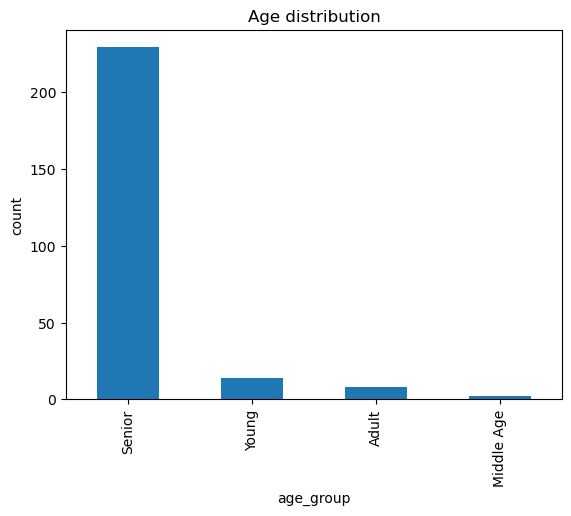

In [44]:
import matplotlib.pyplot as plt
age_group=df["Age_Group"].value_counts()
print(age_group)
age_group.plot(kind="bar")
plt.title("Age distribution")
plt.xlabel("age_group")
plt.ylabel("count")
plt.show()

Diabetes_Flag
1    134
0    119
Name: count, dtype: int64


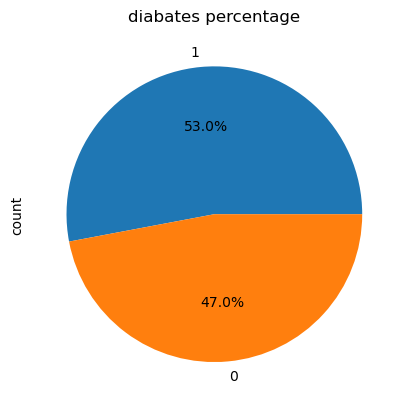

In [45]:
diabetes=df["Diabetes_Flag"].value_counts()
print(diabetes)
diabetes.plot(kind='pie', autopct='%1.1f%%')
plt.title("diabates percentage")
plt.show()

In [46]:
def bp_category(sys, dia):
    if sys < 120 and dia < 80:
        return 'Normal'
    elif 120 <= sys <= 129 and dia < 80:
        return 'Elevated'
    elif (130 <= sys <= 139) or (80 <= dia <= 89):
        return 'High BP Stage 1'
    elif sys >= 140 or dia >= 90:
        return 'High BP Stage 2'
    else:
        return 'Unknown'

df['BP_Category'] = df.apply(
    lambda x: bp_category(x['BP_Systolic'], x['BP_Diastolic']),
    axis=1,
)

BP_Category
High BP Stage 1    166
High BP Stage 2     56
Normal              31
Name: count, dtype: int64


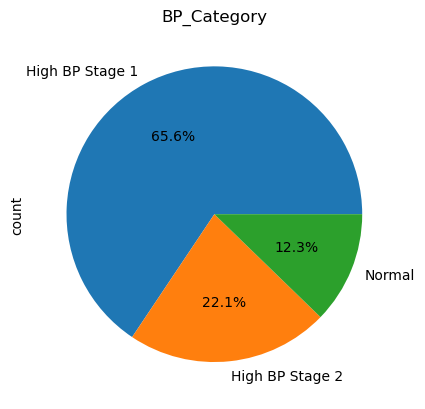

In [47]:
bbp=df["BP_Category"].value_counts()
print(bbp)
bbp.plot(kind="pie",autopct="%1.1f%%")
plt.title("BP_Category")
plt.show()

In [48]:
df['High_BP_Flag'] = df['BP_Category'].isin(
    ['High BP Stage 1', 'High BP Stage 2']
)

In [49]:
bp_age_summary = (
    df.groupby('Age_Group')['High_BP_Flag']
    .mean()
    .reset_index()
)

bp_age_summary['High_BP_Percentage'] = bp_age_summary['High_BP_Flag'] * 100
print(bp_age_summary[['Age_Group', 'High_BP_Percentage']])


    Age_Group  High_BP_Percentage
0       Adult           87.500000
1  Middle Age          100.000000
2      Senior           87.336245
3       Young           92.857143


In [50]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)

BMI_Category
Underweight    133
Normal          83
Overweight      34
Obese            3
Name: count, dtype: int64


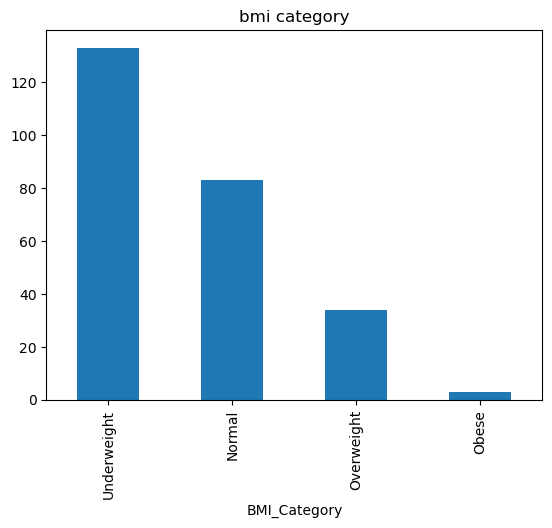

In [51]:
bbi=df["BMI_Category"].value_counts()
print(bbi)
bbi.plot(kind="bar")
plt.title("bmi category")
plt.show()

In [52]:


#avg_bmi_diabetes
abd = (
    df.groupby('Diabetes_Flag')['BMI']
    .mean()
    .reset_index()
)

abd['Diabetes_Status'] = abd['Diabetes_Flag'].map(
    {0: 'Non-Diabetic', 1: 'Diabetic'}
)

print(abd[['Diabetes_Status', 'BMI']])


  Diabetes_Status        BMI
0    Non-Diabetic  20.406915
1        Diabetic  19.856382


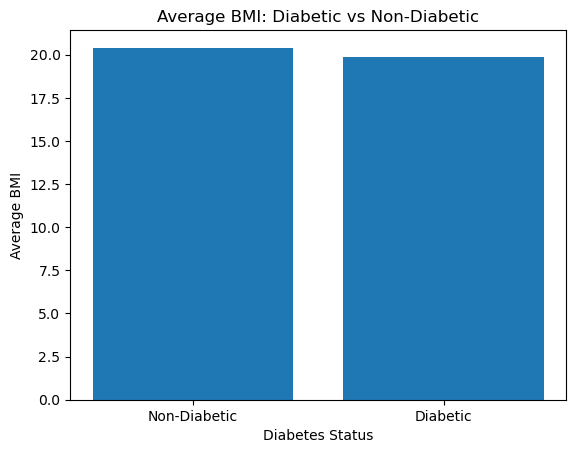

In [53]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    abd['Diabetes_Status'],
    abd['BMI']
)
plt.title('Average BMI: Diabetic vs Non-Diabetic')
plt.xlabel('Diabetes Status')
plt.ylabel('Average BMI')
plt.show()


<Figure size 640x480 with 0 Axes>

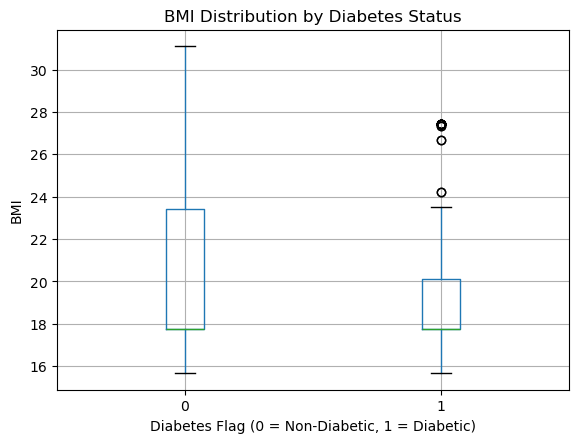

In [54]:
plt.figure()
df.boxplot(column='BMI', by='Diabetes_Flag')
plt.title('BMI Distribution by Diabetes Status')
plt.suptitle('')
plt.xlabel('Diabetes Flag (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('BMI')
plt.show()


In [55]:
abm = df.groupby('Visit_Month')["Date_Visit"].value_counts()
print(abm)

Visit_Month  Date_Visit
April        4/13/2023     2
             4/10/2023     1
             4/11/2023     1
             4/16/2023     1
             4/17/2023     1
                          ..
September    9/18/2023     1
             9/21/2023     1
             9/22/2023     1
             9/25/2023     1
             9/27/2023     1
Name: count, Length: 123, dtype: int64


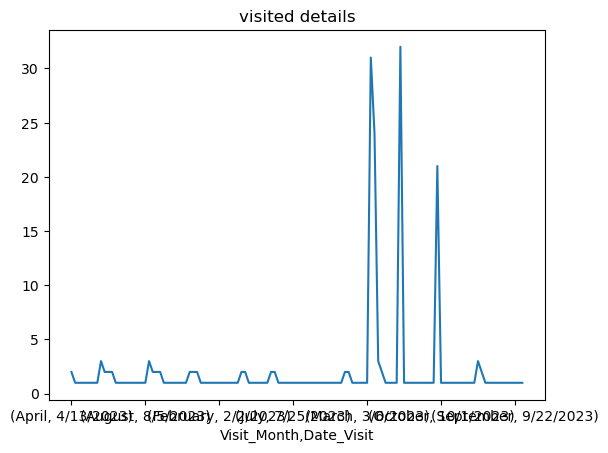

In [56]:
abm.plot(kind="line")
plt.title("visited details")
plt.show()

In [57]:
diabetes_df = df[df['Diabetes_Flag'] == 1]
monthly_diabetes = (
    diabetes_df.groupby('Visit_Month')
    .size()
    .reset_index(name='Diabetes_Visit_Count')
)

print(monthly_diabetes)


   Visit_Month  Diabetes_Visit_Count
0        April                     5
1       August                    11
2     December                     8
3     February                    11
4      January                     3
5         July                     8
6         June                     4
7        March                     6
8          May                    30
9     November                    25
10     October                    14
11   September                     9


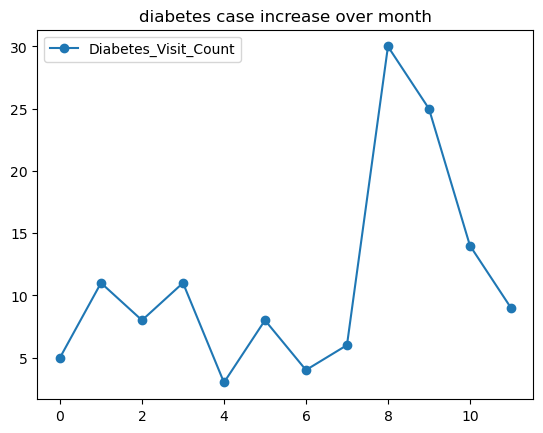

In [58]:
monthly_diabetes.plot(kind="line",marker="o")
plt.title("diabetes case increase over month")
plt.show()

In [59]:
gender_diabetes = (
    df.groupby('Gender')['Diabetes_Flag']
    .mean()
    .reset_index()
)

gender_diabetes['Diabetes_Percentage'] = gender_diabetes['Diabetes_Flag'] * 100

print(gender_diabetes[['Gender', 'Diabetes_Percentage']])


   Gender  Diabetes_Percentage
0  Female            50.314465
1    Male            57.446809


In [60]:
gender_counts = (
    df.groupby(['Gender', 'Diabetes_Flag'])
    .size()
    .unstack(fill_value=0)
)

gender_counts.columns = ['Non_Diabetic', 'Diabetic']
print(gender_counts)


        Non_Diabetic  Diabetic
Gender                        
Female            79        80
Male              40        54


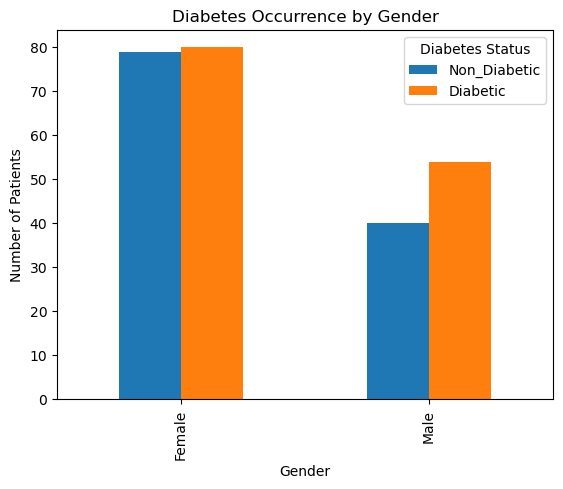

In [61]:
import matplotlib.pyplot as plt

gender_counts.plot(kind='bar')
plt.title('Diabetes Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(title='Diabetes Status')
plt.show()


In [62]:
#which age group is most at risk
diabetic_patients = df[df['Diabetes_Flag'] == 1]
monthly_diabetes_visits = (
    diabetic_patients
    .groupby('Age_Group')
    .size()
    .reset_index(name='Diabetes_Visit_Count')
)

print(monthly_diabetes_visits)


  Age_Group  Diabetes_Visit_Count
0     Adult                     3
1    Senior                   121
2     Young                    10


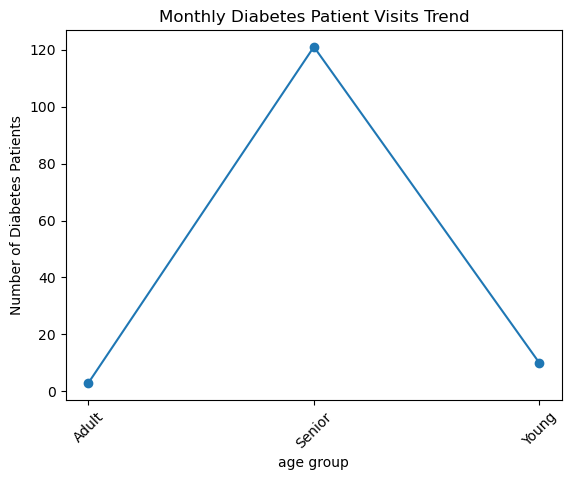

In [63]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(
    monthly_diabetes_visits['Age_Group'],
    monthly_diabetes_visits['Diabetes_Visit_Count'],
    marker='o'
)
plt.title('Monthly Diabetes Patient Visits Trend')
plt.xlabel('age group')
plt.ylabel('Number of Diabetes Patients')
plt.xticks(rotation=45)
plt.show()


In [64]:
high_risk_patients = df[
    (df['Age_Group'] == 'Senior') &
    (df['Diabetes_Flag'] == 1) &
    (df['BP_Category'].isin(['High BP Stage 1', 'High BP Stage 2']))
]

In [65]:
high_risk_count = high_risk_patients.shape[0]
print("High-Risk Patients (Priority Medical Attention):", high_risk_count)

High-Risk Patients (Priority Medical Attention): 109


In [66]:
high_risk_patients[
    ['Name', 'Age_Group', 'BP_Category', 'Diabetes_Flag']
]


,Name,Age_Group,BP_Category,Diabetes_Flag
1,Mark,Senior,High BP Stage 1,1
2,Eve,Senior,High BP Stage 2,1
6,Robert,Senior,High BP Stage 1,1
7,Robert,Senior,High BP Stage 1,1
10,Robert,Senior,High BP Stage 1,1
...,...,...,...,...
244,Eve,Senior,High BP Stage 1,1
246,Robert,Senior,High BP Stage 1,1
249,John,Senior,High BP Stage 1,1
250,Robert,Senior,High BP Stage 1,1


In [67]:
high_risk_percentage = (high_risk_count / len(df)) * 100
print(f"High-Risk Patient Percentage: {high_risk_percentage:.2f}%")


High-Risk Patient Percentage: 43.08%


In [68]:
recommendations = [
    "Immediate follow-up consultations",
    "Regular BP & glucose monitoring",
    "Priority appointment scheduling",
    "Lifestyle and diet counseling",
    "Medication adherence programs"
]

recommendations


['Immediate follow-up consultations',
 'Regular BP & glucose monitoring',
 'Priority appointment scheduling',
 'Lifestyle and diet counseling',
 'Medication adherence programs']